In [1]:
# | tags: [parameters]
subject = "101"

In [2]:
# | tags: [parameters]
# Injected Parameters
subject = 152


In [3]:
import mne
from mne.preprocessing import ICA
import autoreject
from pathlib import Path
import pandas as pd
from datetime import datetime
import json
import os

from spectral.utils import print_date_time, read_parameters, config_project
from spectral.ica import compute_ica
from spectral.viz import plot_step, plot_bad_channels, plot_epochs
from spectral.specparam import specparam2pandas


config = read_parameters()
my_paths = config_project(subject)
project_path = my_paths["project_path"]
figures_path = my_paths["figures_path"]
specparam_path = my_paths["specparam_path"]

Path(specparam_path).mkdir(parents=True, exist_ok=True)

mne.viz.set_browser_backend("matplotlib")
# mne.viz.set_browser_backend("qt")
mne.set_config("MNE_BROWSER_THEME", "light")
# matplotlib.use("Agg")
print_date_time()

Using matplotlib as 2D backend.


2024-05-06 03:08:25


# Start raport


Opening raw data file /Users/daniel/PhD/Projects/psd-path/analysis/sub-152_filtered_raw.fif...


    Range : 750 ... 79839 =      3.000 ...   319.356 secs


Ready.


Reading 0 ... 79089  =      0.000 ...   316.356 secs...


Embedding : jquery-3.6.0.min.js


Embedding : bootstrap.bundle.min.js


Embedding : bootstrap.min.css


Embedding : bootstrap-table/bootstrap-table.min.js


Embedding : bootstrap-table/bootstrap-table.min.css


Embedding : bootstrap-table/bootstrap-table-copy-rows.min.js


Embedding : bootstrap-table/bootstrap-table-export.min.js


Embedding : bootstrap-table/tableExport.min.js


Embedding : bootstrap-icons/bootstrap-icons.mne.min.css


Embedding : highlightjs/highlight.min.js


Embedding : highlightjs/atom-one-dark-reasonable.min.css


Setting 5658 of 79090 (7.15%) samples to NaN, retaining 73432 (92.85%) samples.


Effective window size : 8.192 (s)


Plotting power spectral density (dB=True).


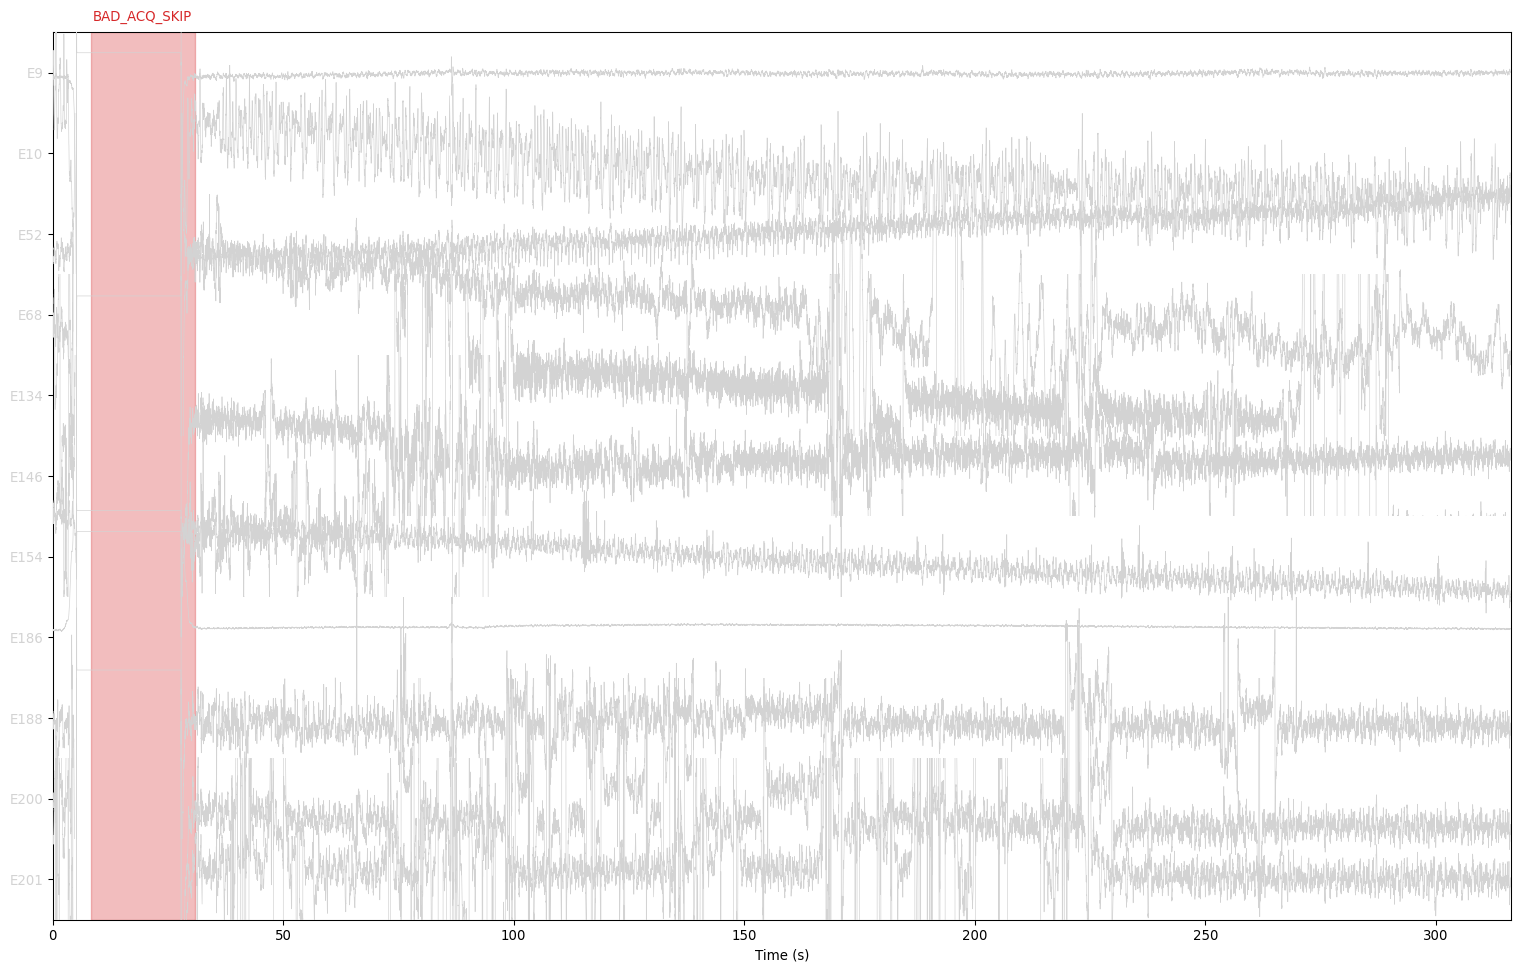

In [4]:
clean_raw = mne.io.read_raw_fif(
    f"{project_path}/analysis/sub-{subject}_filtered_raw.fif", preload=True
)
report = mne.Report(title=f"Report for subject {subject}", subject=subject)
report.add_raw(
    raw=clean_raw, title="Raw", psd=True, butterfly=True, scalings="auto"
)  # omit PSD plot
total_duration = clean_raw.times[-1]

try:
    # Add bad channels plot
    bad_channel_plot = clean_raw.plot(
        picks=clean_raw.info["bads"],
        duration=total_duration,
        scalings=dict(eeg=1e-4),
        show_scrollbars=False,
    )
    report.add_figure(bad_channel_plot, title="Rejected bad channels")
except Exception as e:
    print(f"An error occurred: {e}")

In [5]:
# Load the Excel file
df = pd.read_excel("ICA TO REMOVE.xlsx")

# Print the DataFrame
df_extracted = df.iloc[:, :2]
df_extracted = df_extracted.rename(
    columns={df_extracted.columns[1]: "ica_bad_components"}
)

row = df_extracted.loc[df_extracted["ID"] == subject]
ica_bad_components_string = row["ica_bad_components"].iloc[0]
ica_bad_components = [int(component) for component in ica_bad_components_string.split()]

print(f"ID: {subject}, ICA Bad Components: {ica_bad_components}")

epochs_good = mne.read_epochs(
    f"{project_path}/analysis/sub-{subject}_good_epochs-epo.fif"
)
ica = mne.preprocessing.read_ica(
    f"{project_path}/analysis/sub-{subject}_my_ica_model-ica.fif"
)
ica.exclude = ica_bad_components

ID: 152, ICA Bad Components: [0, 6, 7, 15, 21, 30]
Reading /Users/daniel/PhD/Projects/psd-path/analysis/sub-152_good_epochs-epo.fif ...


    Found the data of interest:


        t =       0.00 ...    5000.00 ms


        0 CTF compensation matrices available


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


Reading /Users/daniel/PhD/Projects/psd-path/analysis/sub-152_my_ica_model-ica.fif ...


Now restoring ICA solution ...


Ready.


# ICA


In [6]:
report.add_ica(
    ica=ica,
    title="ICA bad component",
    picks=ica.exclude,  # plot the excluded EOG components
    inst=epochs_good,
    n_jobs=None,  # could be increased!
)


ica_indices = list(range(ica.n_components_))
good_components = [i for i in ica_indices if i not in ica_bad_components]

report.add_ica(
    ica=ica,
    title="ICA good components",
    picks=good_components,  # plot the excluded EOG components
    inst=epochs_good,
    n_jobs=None,  # could be increased!
)

Applying ICA to Evoked instance


    Transforming to ICA space (42 components)


    Zeroing out 6 ICA components


    Projecting back using 193 PCA components


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


Applying ICA to Evoked instance


    Transforming to ICA space (42 components)


    Zeroing out 6 ICA components


    Projecting back using 193 PCA components


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    5.7s


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


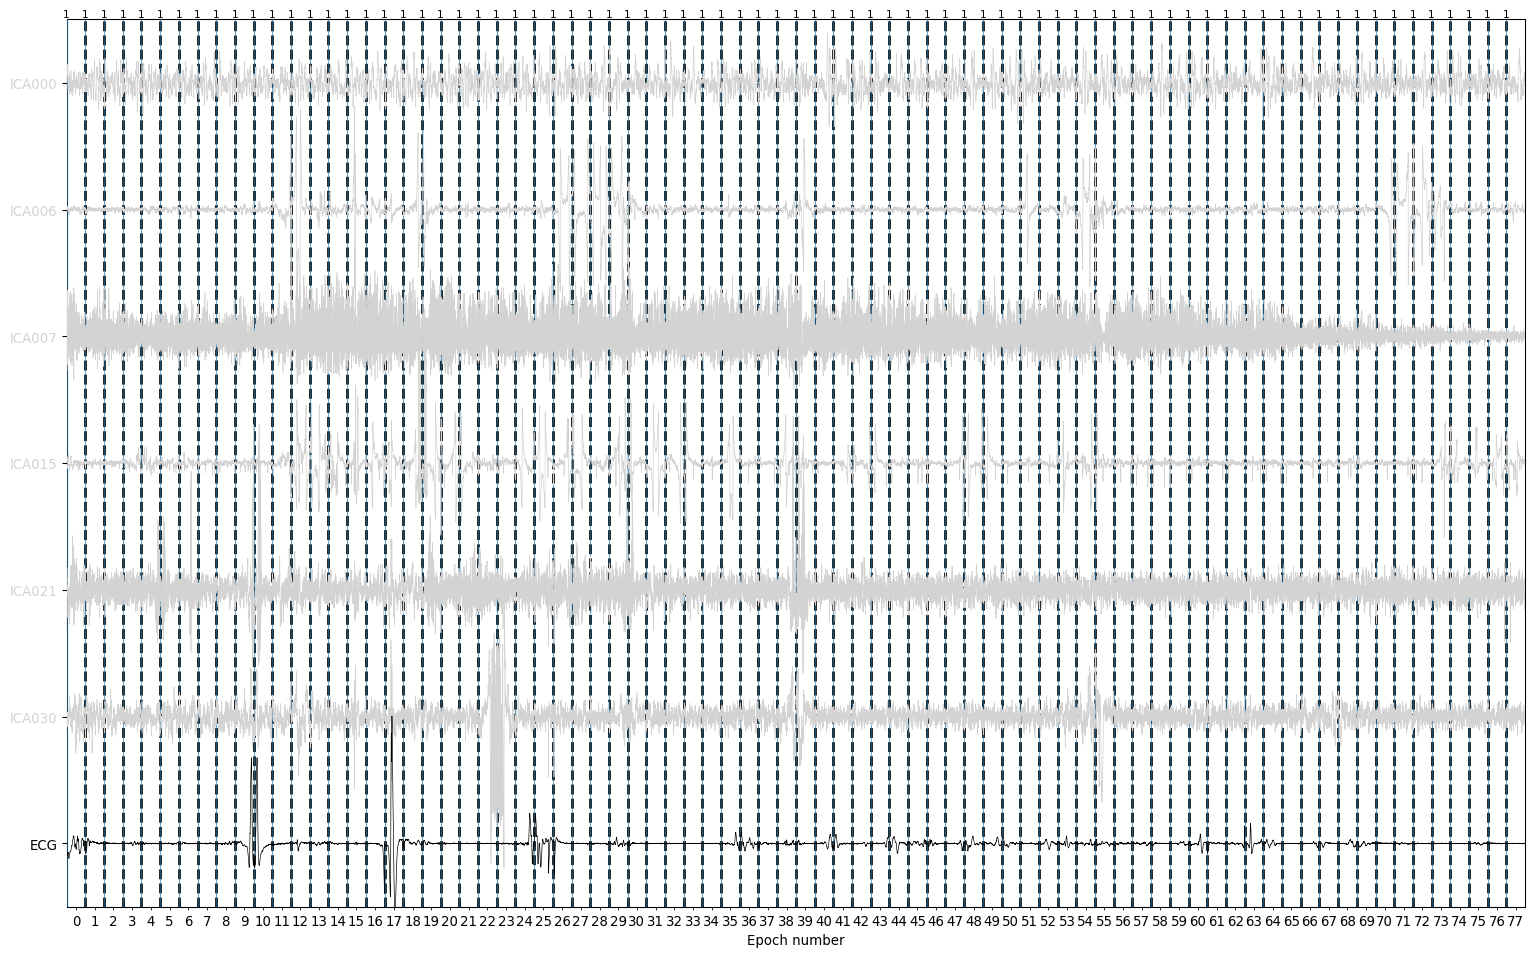

In [7]:
ica_plot_whole_timeseries = ica.plot_sources(
    epochs_good,
    picks=ica_bad_components,
    show_scrollbars=False,
    start=0,
    stop=len(epochs_good) - 1,
)
report.add_figure(
    ica_plot_whole_timeseries, title="Removed ICA components - whole timeseries"
)

Not setting metadata


79 matching events found


No baseline correction applied


0 projection items activated


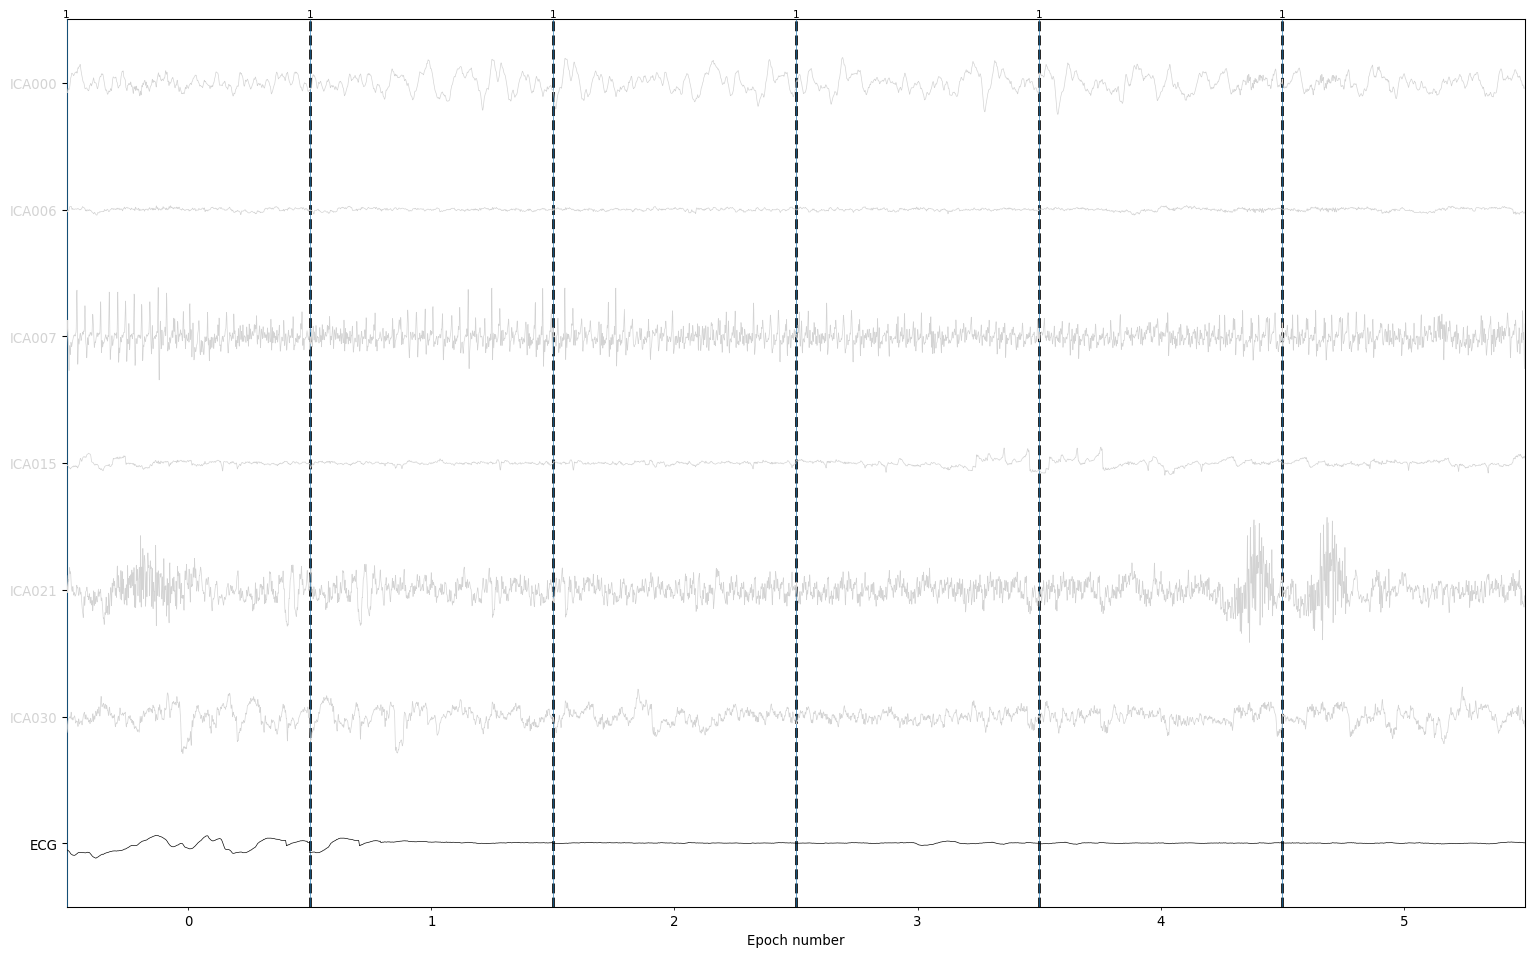

In [8]:
ica_plot_whole_timeseries = ica.plot_sources(
    epochs_good,
    picks=ica_bad_components,
    show_scrollbars=False,
    start=0,
    stop=6,
)
report.add_figure(
    ica_plot_whole_timeseries, title="Removed ICA components - first 5 epochs"
)

ICA should be applied before the spatial interpolation of the non-functional channels.


# ICA plot overlay


Applying ICA to Evoked instance


    Transforming to ICA space (42 components)


    Zeroing out 6 ICA components


    Projecting back using 193 PCA components


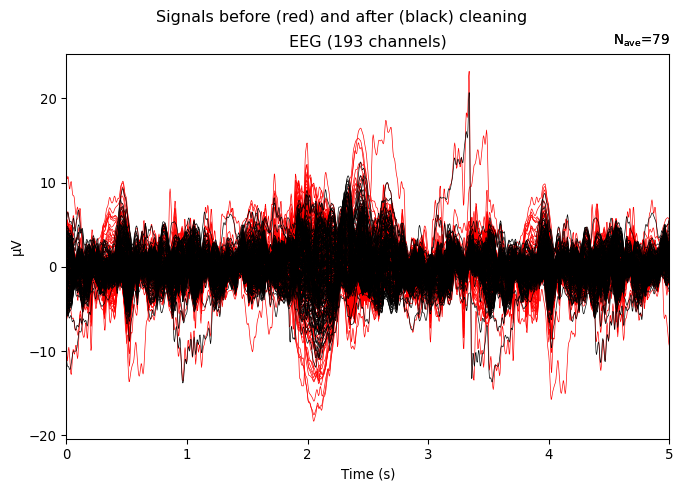

In [9]:
cleaned_plot = ica.plot_overlay(epochs_good.average())

No projector specified for this dataset. Please consider the method self.add_proj.


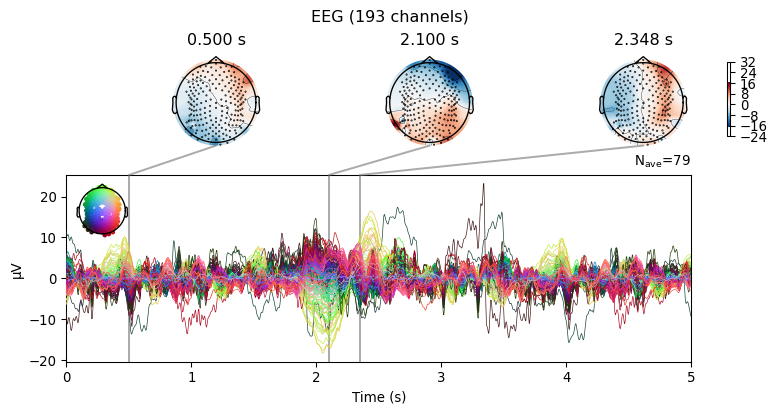

Effective window size : 5.004 (s)


Plotting power spectral density (dB=True).


Averaging across epochs...


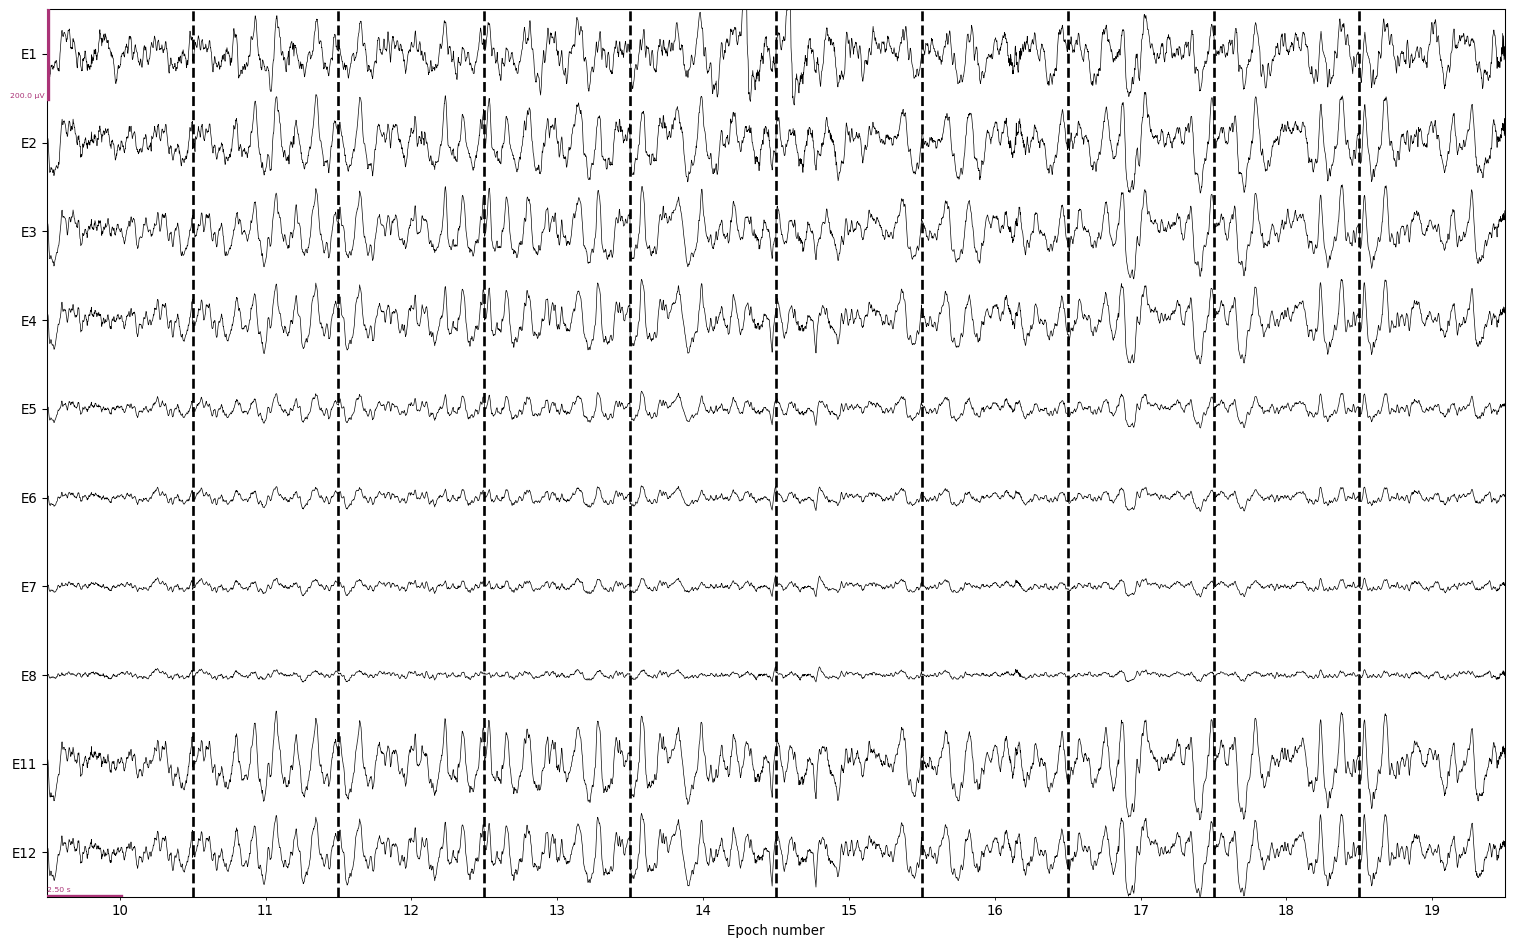

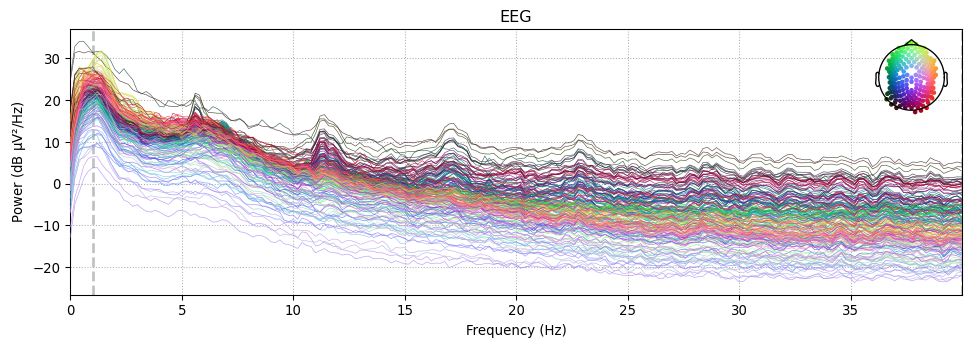

In [10]:
epochs_plot, epochs_timeseries, epochs_plot_psd = plot_epochs(
    epochs_good, figures_path=figures_path, subject=subject, fmax=40.0
)
report.add_figure(epochs_plot, title="Epochs before ICA")
report.add_figure(epochs_timeseries, title="Epochs before ICA - timesires")

# report.add_figure(epochs_plot_psd, title="Epochs before ICA - PSD")

Applying ICA to Epochs instance


    Transforming to ICA space (42 components)


    Zeroing out 6 ICA components


    Projecting back using 193 PCA components


No projector specified for this dataset. Please consider the method self.add_proj.


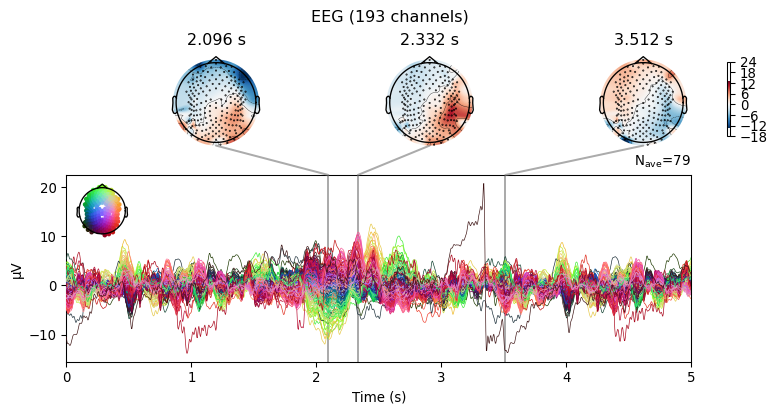

Effective window size : 5.004 (s)


Plotting power spectral density (dB=True).


Averaging across epochs...


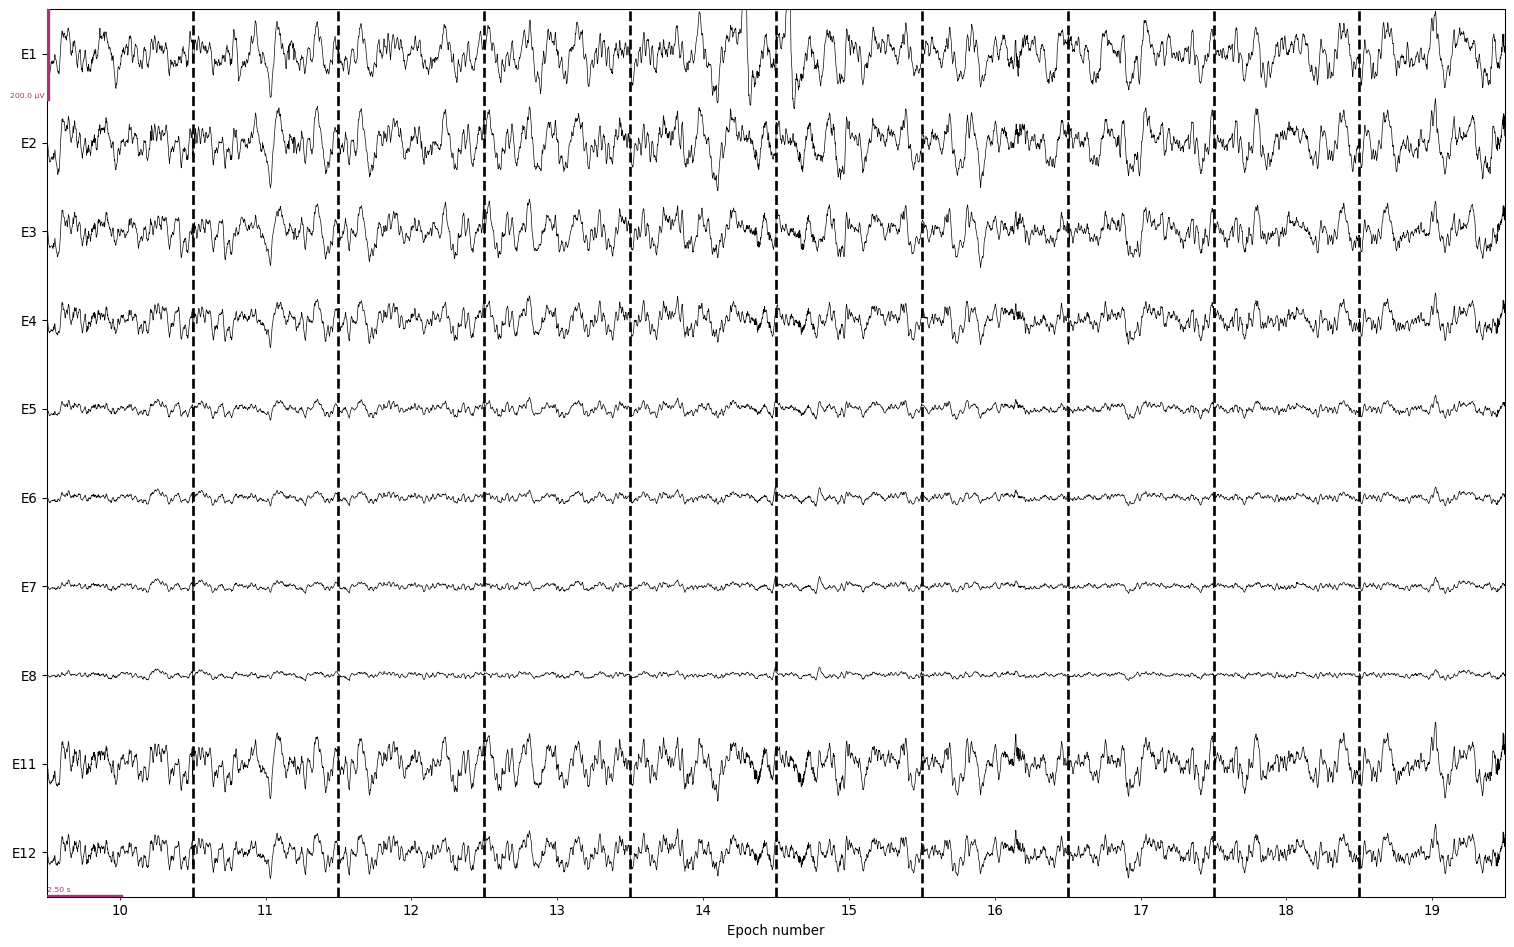

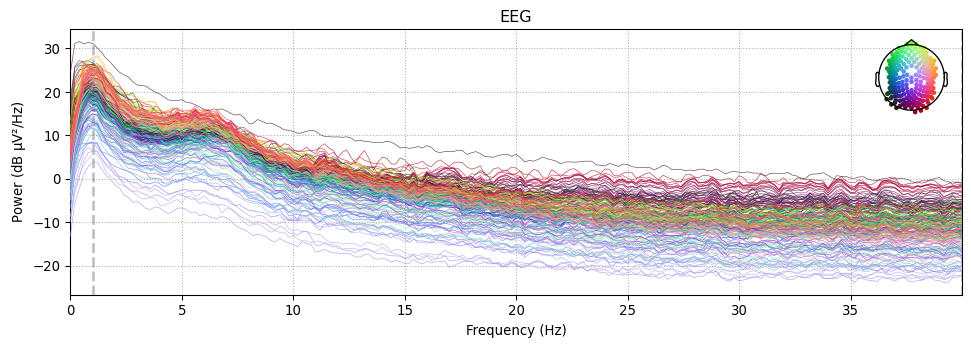

In [11]:
epochs_clean_manual = ica.apply(epochs_good.copy(), exclude=ica.exclude)
epochs_plot, epochs_timeseries, epochs_plot_psd = plot_epochs(
    epochs_clean_manual, figures_path=figures_path, subject=subject, fmax=40.0
)
report.add_figure(epochs_plot, title="Cleaned epochs after ICA")
report.add_figure(epochs_timeseries, title="Epochs after ICA - timesires")

# report.add_figure(epochs_plot_psd, title="Cleaned epochs after ICA - PSD")

Effective window size : 5.004 (s)


Plotting power spectral density (dB=True).


Averaging across epochs...


Effective window size : 5.004 (s)


Plotting power spectral density (dB=True).


Averaging across epochs...


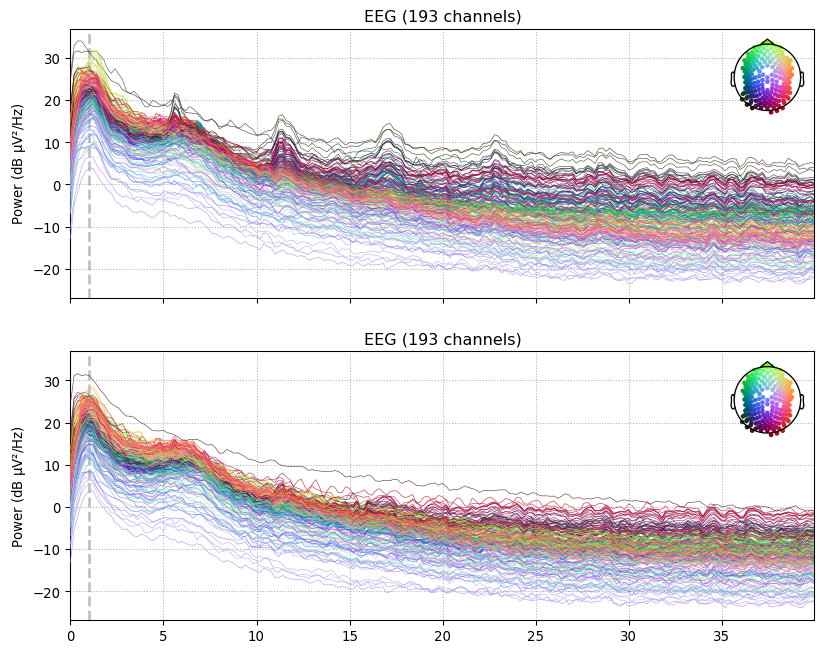

In [12]:
import matplotlib.pyplot as plt

fmax = 40.0
fig_psd, axs = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 8))

epochs_plot_psd = epochs_good.compute_psd(
    method="welch", picks="eeg", fmax=fmax, exclude="bads"
).plot(
    average=False, picks="eeg", exclude="bads", show=False, amplitude=False, axes=axs[0]
)
epochs_plot_psd = epochs_clean_manual.compute_psd(
    method="welch", picks="eeg", fmax=fmax, exclude="bads"
).plot(
    average=False, picks="eeg", exclude="bads", show=False, amplitude=False, axes=axs[1]
)

report.add_figure(fig_psd, title="Epochs  before and after ICA - PSD")

# Final part of the analysis


fitting finished


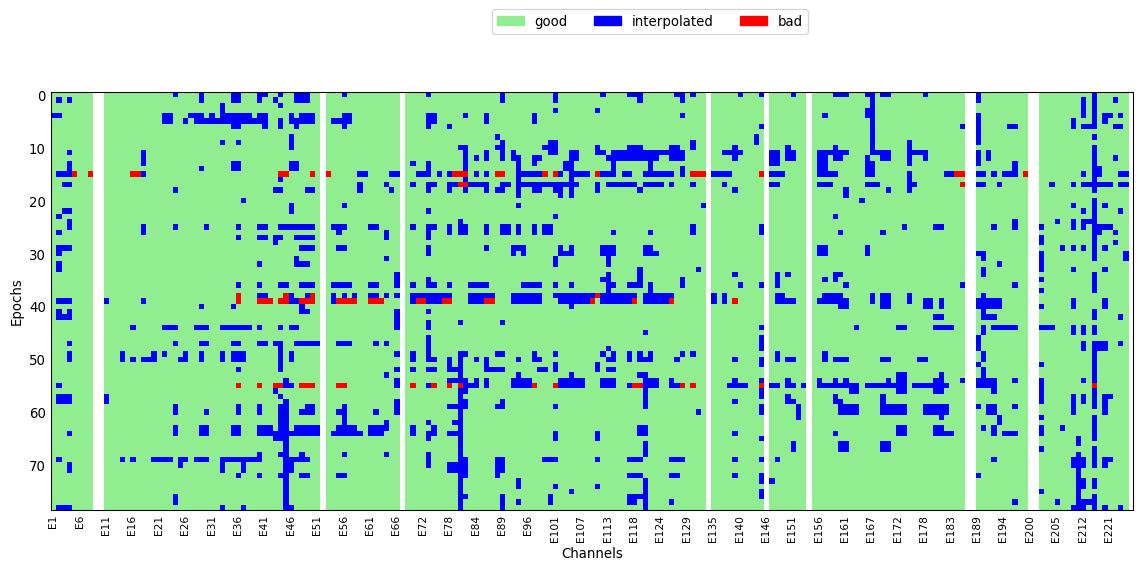

In [13]:
auto_reject_pre_ica = autoreject.AutoReject(
    n_interpolate=[1, 2, 4, 8, 32, 64],
    n_jobs=-1,
    random_state=100,
    thresh_method="bayesian_optimization",
    verbose=False,
    # n_interpolate=np.array([0]),
    # consensus=0.8,
).fit(epochs_clean_manual[:20])
print("fitting finished")
epochs_ar, reject_log = auto_reject_pre_ica.transform(
    epochs_clean_manual, return_log=True
)


# depending of the resampling - different number of epochs are rejected

reject_plot = reject_log.plot("vertical")
report.add_figure(reject_plot, title="Interpolated epochs - AutoReject overview")

In [14]:
epochs_interpolated = epochs_ar.copy().interpolate_bads(exclude=["VREF"])
epochs_interpolated.save(
    f"{project_path}/analysis/sub-{subject}_interpolated-epo.fif", overwrite=True
)

Setting channel interpolation method to {'eeg': 'spline'}.


Interpolating bad channels.


    Automatic origin fit: head of radius 95.5 mm


Computing interpolation matrix from 193 sensor positions


Interpolating 11 sensors


Overwriting existing file.


Overwriting existing file.


No projector specified for this dataset. Please consider the method self.add_proj.


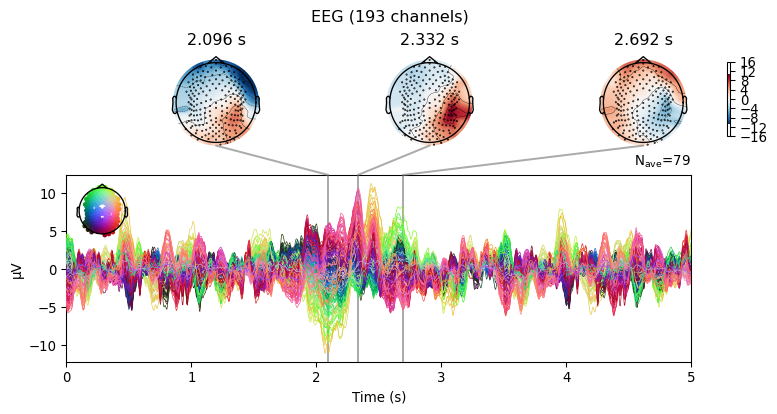

Effective window size : 5.004 (s)


Plotting power spectral density (dB=True).


Averaging across epochs...


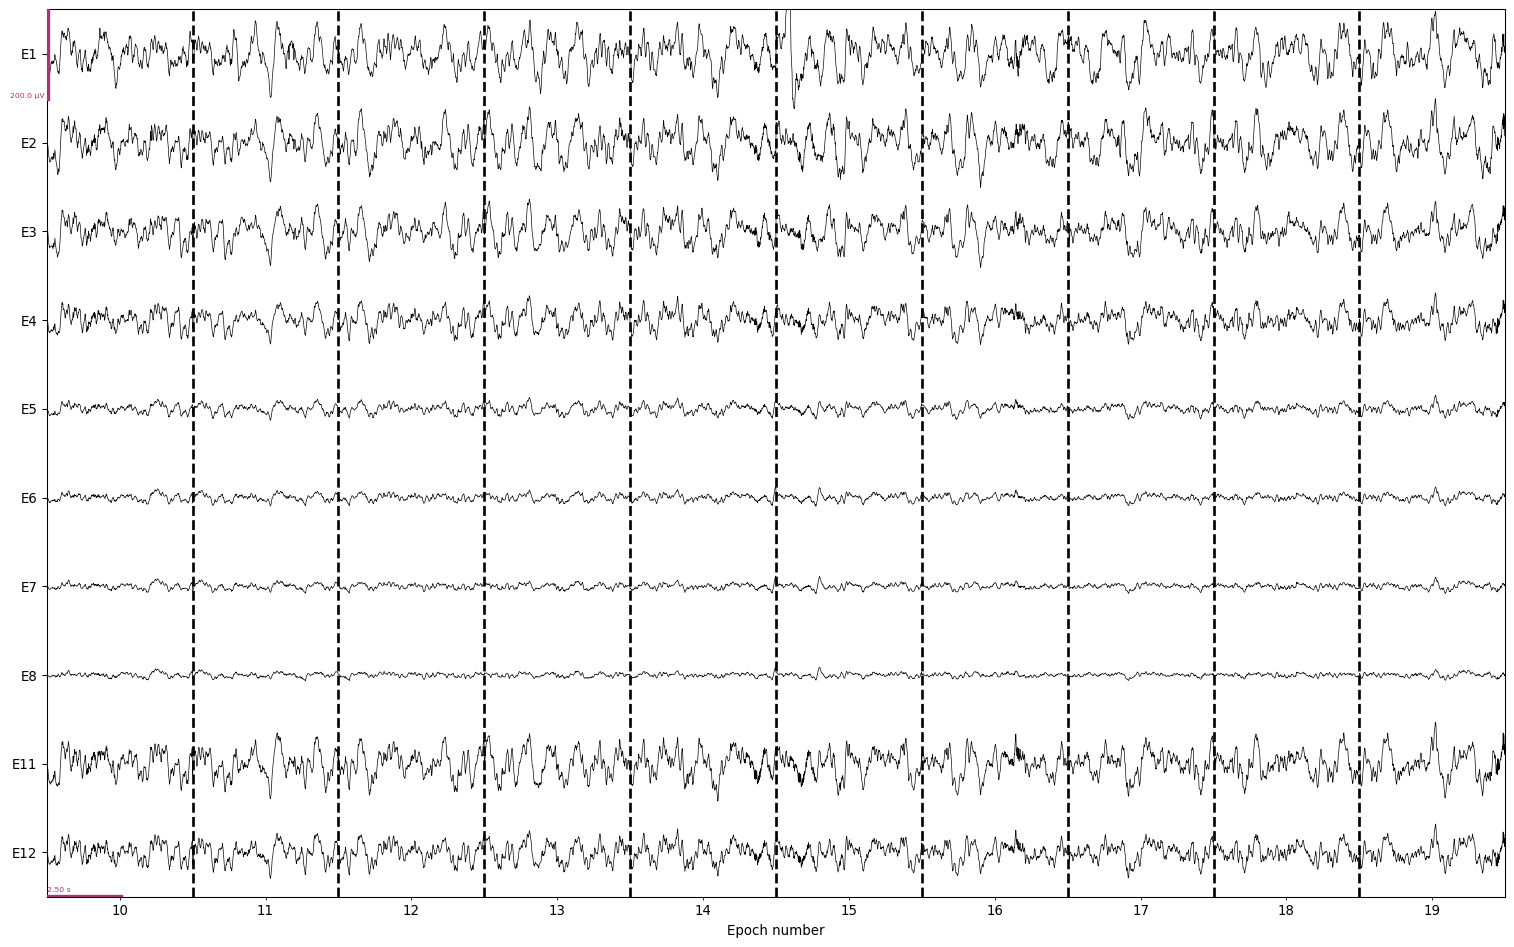

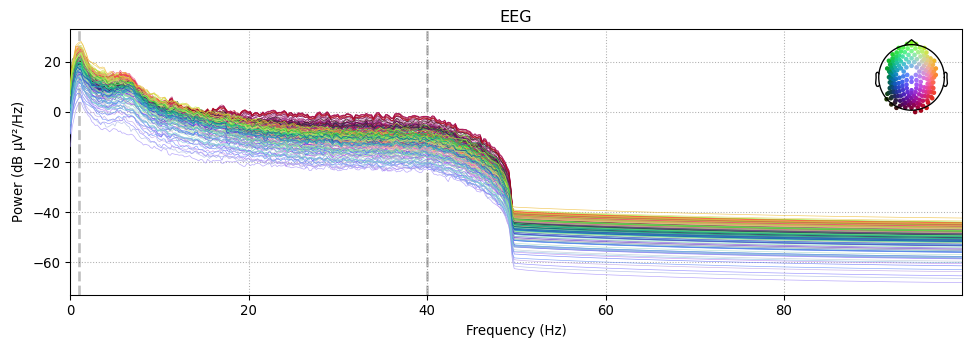

In [15]:
# epochs_interpolated
epochs_plot_interpolated, epochs_timeseries, epochs_plot_psd_interpolated = plot_epochs(
    epochs_ar, figures_path, subject, stage="final_interpolared_epochs"
)
# Add figures to the report
report.add_figure(epochs_plot_interpolated, title="Interpolated epochs")
report.add_figure(epochs_plot_psd_interpolated, title="Interpolated epochs - PSD")

In [16]:
from specparam.plts.spectra import plot_spectra
from specparam import SpectralGroupModel


fg = SpectralGroupModel(
    peak_width_limits=[1, 6],
    min_peak_height=0.15,
    peak_threshold=2.0,
    max_n_peaks=6,
    verbose=False,
)

    Using multitaper spectrum estimation with 7 DPSS windows


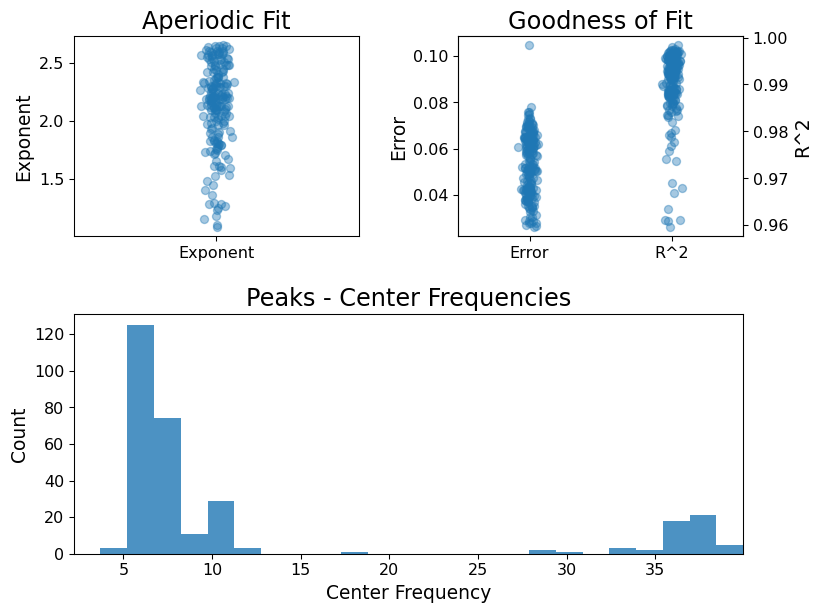

In [17]:
psd = epochs_ar.compute_psd().average()
spectra, freqs = psd.get_data(return_freqs=True)
# Initialize a FOOOFGroup object, with desired settings

# Define the frequency range to fit
freq_range = [2, 40]
fg.fit(freqs, spectra, freq_range)
specparam_fig = f"{figures_path}sub-{subject}_specparam_plot.png"
my_plot = fg.plot(save_fig=True, file_name=specparam_fig)
report.add_image(
    image=specparam_fig, title="Specparam fit", caption="Results of specparam fit"
)

In [18]:
channel_names = epochs_ar.info["ch_names"]
df_channels = pd.DataFrame({"ID": range(len(channel_names)), "ch": channel_names})

df = specparam2pandas(fg)
df = df.merge(df_channels, on="ID")
df["sub_id"] = subject


# Get the current date and time
now = datetime.now()
df["timestamp"] = now
df["nr_intepolated_channels"] = len(epochs_ar.info["bads"])
df["nr_dropped_ica"] = len(ica.exclude)
df["nr_retained_ica"] = ica.n_components_ - len(ica.exclude)
# Create a new list of column names
cols = ["ch"] + [col for col in df.columns if col != "ch"]

# Reorder the columns
df = df[cols]

# Plot R and exponent across the scalp


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


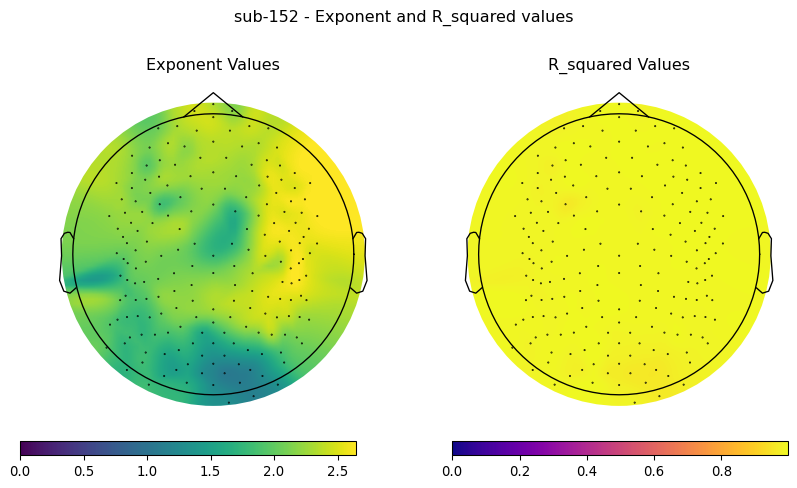

In [19]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import mne  # Make sure you have the MNE library installe


def exclude_bad_channels(epochs):
    """Modify to MNE object to exclude bad channels"""
    all_channels = epochs.info["ch_names"]
    bad_channels = epochs.info["bads"]
    good_channels = [ch for ch in all_channels if ch not in bad_channels]
    epochs_good = epochs.copy().pick_channels(good_channels)
    return epochs_good


epochs_ar_good = exclude_bad_channels(epochs_ar)


def plot_specparam_on_scalp(fg, epochs_ar_good, subject):
    # Extract aperiodic exponent values
    exps = fg.get_params("aperiodic_params", "exponent")
    r_squared = fg.get_params("r_squared")

    # Assuming 'exps' is your data array and 'raw' is an MNE raw object
    # Also, assuming 'unit_label' and 'fontsize' variables are defined

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # The 'cmap' parameter expects a colormap object, not a string
    im1, _ = mne.viz.plot_topomap(
        exps, epochs_ar_good.info, axes=axs[0], cmap="viridis", contours=0, show=False
    )
    axs[0].set_title("Exponent Values")

    #  Colorbar setup for the first subplot at the bottom
    cbar_ax1 = fig.add_axes([0.1, 0.05, 0.35, 0.03])
    fig.colorbar(im1, cax=cbar_ax1, orientation="horizontal")

    # Plot the 'errors' data in the second subplot
    im2, _ = mne.viz.plot_topomap(
        r_squared,
        epochs_ar_good.info,
        axes=axs[1],
        cmap="plasma",
        contours=0,
        show=False,
    )
    axs[1].set_title("R_squared Values")

    # Colorbar setup for the second subplot at the bottom
    cbar_ax2 = fig.add_axes([0.55, 0.05, 0.35, 0.03])
    fig.colorbar(im2, cax=cbar_ax2, orientation="horizontal")
    fig.suptitle(f"sub-{subject} - Exponent and R_squared values")

    plt.show()


report.add_figure(fig, title="Exponent and R_squared values")

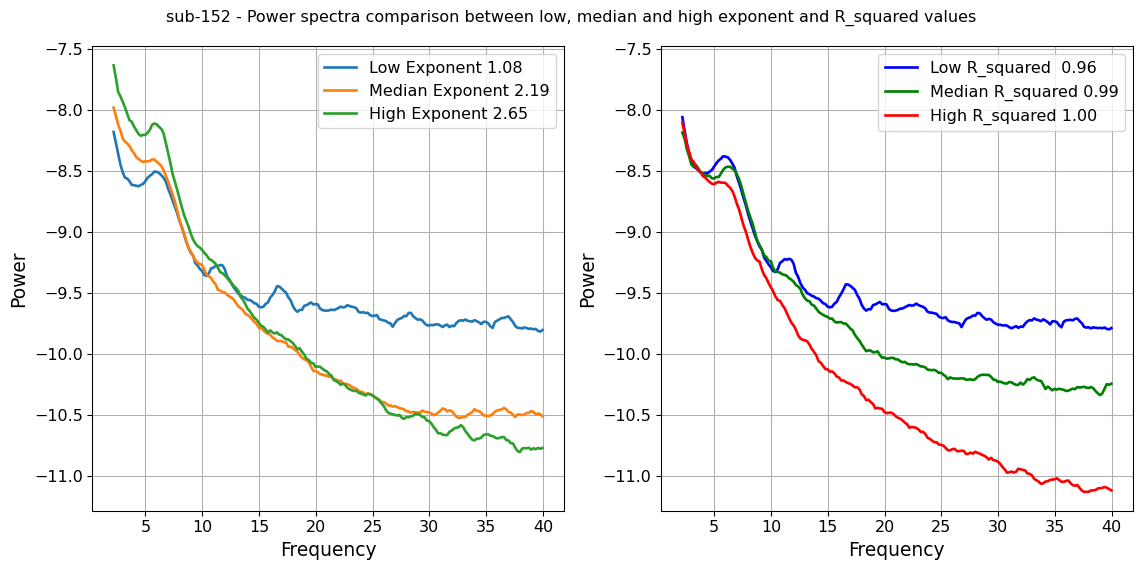

In [20]:
# Compare the power spectra between low and high exponent channels
def examine_spectra(fg, subject):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    def argmedian(arr):
        return np.argsort(arr)[len(arr) // 2]

    exps = fg.get_params("aperiodic_params", "exponent")
    r_squared = fg.get_params("r_squared")
    spectra_exp = [
        fg.get_model(np.argmin(exps)).power_spectrum,
        fg.get_model(argmedian(exps)).power_spectrum,
        fg.get_model(np.argmax(exps)).power_spectrum,
    ]

    labels_spectra_exp = [
        f"Low Exponent {format(np.min(exps), '.2f')}",
        f"Median Exponent {format(np.median(exps), '.2f')}",
        f"High Exponent {format(np.max(exps), '.2f')}",
    ]

    plot_spectra(
        fg.freqs,
        spectra_exp,
        ax=ax[0],
        labels=labels_spectra_exp,
    )

    spectra_r_squared = [
        fg.get_model(np.argmin(r_squared)).power_spectrum,
        fg.get_model(argmedian(r_squared)).power_spectrum,
        fg.get_model(np.argmax(r_squared)).power_spectrum,
    ]

    labels_spectra_r_squared = [
        f"Low R_squared  {format(np.min(r_squared), '.2f')}",
        f"Median R_squared {format(np.median(r_squared), '.2f')}",
        f"High R_squared {format(np.max(r_squared), '.2f')}",
    ]

    my_colors = ["blue", "green", "red"]
    plot_spectra(
        fg.freqs,
        spectra_r_squared,
        ax=ax[1],
        labels=labels_spectra_r_squared,
        colors=my_colors,
    )
    ylim1 = ax[0].get_ylim()
    ylim2 = ax[1].get_ylim()
    # Set the same limits on the y-axis for both plots
    ax[0].set_ylim(min(ylim1[0], ylim2[0]), max(ylim1[1], ylim2[1]))
    ax[1].set_ylim(min(ylim1[0], ylim2[0]), max(ylim1[1], ylim2[1]))
    fig.suptitle(
        f"sub-{subject} - Power spectra comparison between low, median and high exponent and R_squared values"
    )


report.add_figure(
    fig, title="Examples of spectra as a function of exponent and R_squared values"
)

                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 2 - 40 Hz                        
                                 Frequency Resolution is 0.20 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -8.1525, 1.0812                                          
                                                                                                  
                                       1 peaks were found:                                        
          

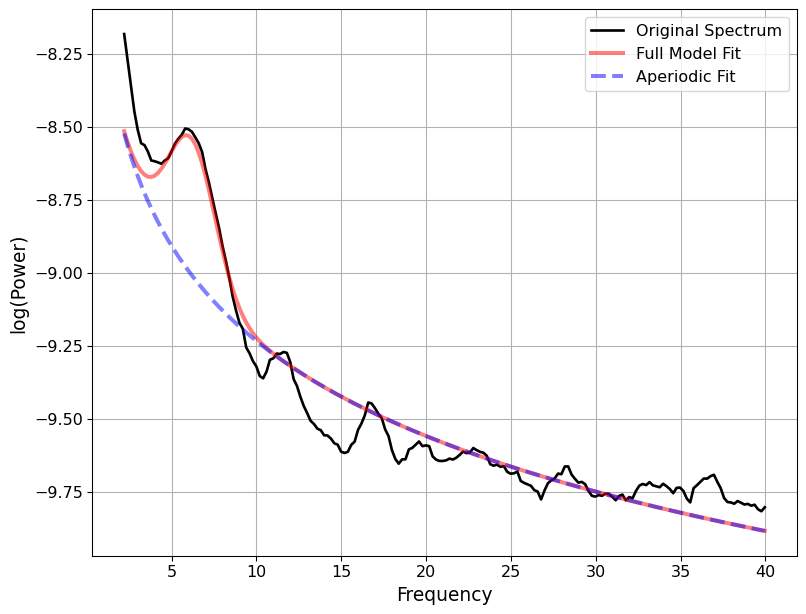

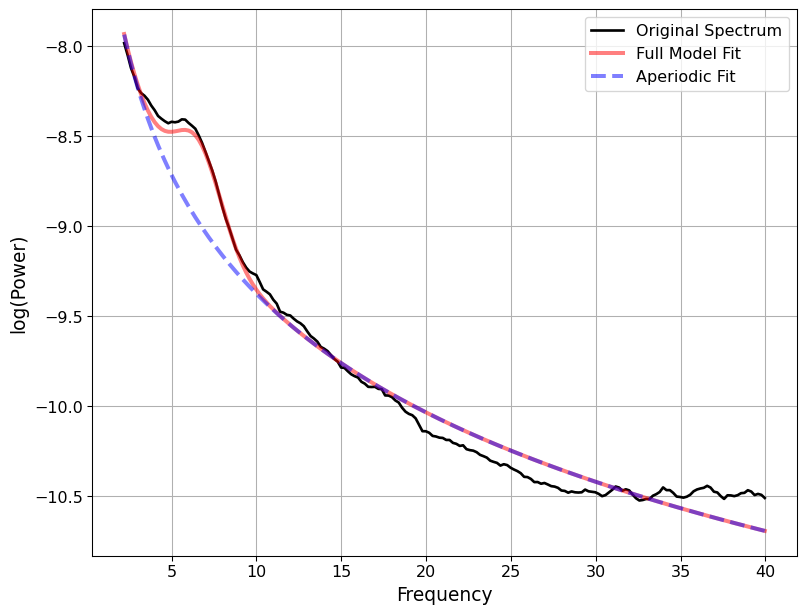

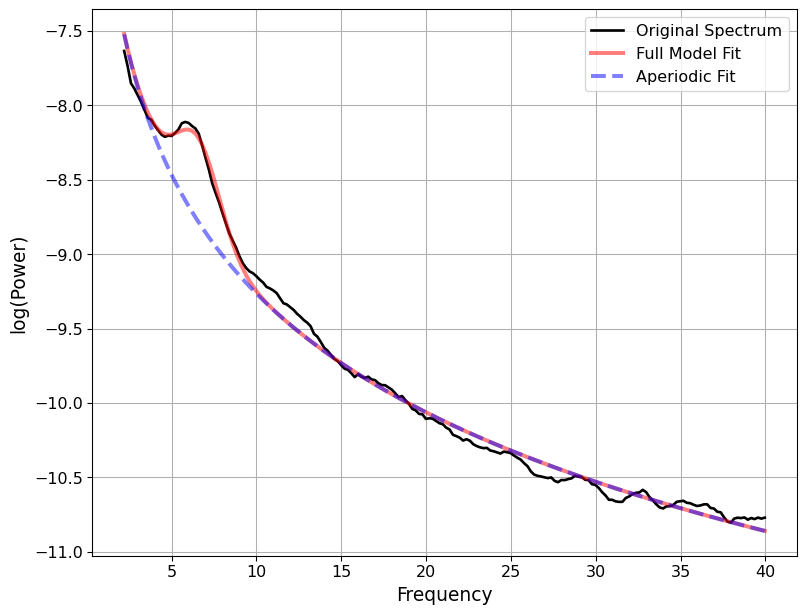

In [21]:
spectra_exp_fm = [
    fg.get_model(np.argmin(exps), regenerate=True),
    fg.get_model(argmedian(exps), regenerate=True),
    fg.get_model(np.argmax(exps), regenerate=True),
]
for fm, label in zip(spectra_exp_fm, labels_spectra_exp):
    # fm = fg.get_fooof(ind=2, regenerate=True)
    # Print results and plot extracted model fit
    fm.print_results()
    fm.plot()
    print(label)

                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 2 - 40 Hz                        
                                 Frequency Resolution is 0.20 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -8.0131, 1.1775                                          
                                                                                                  
                                       1 peaks were found:                                        
          

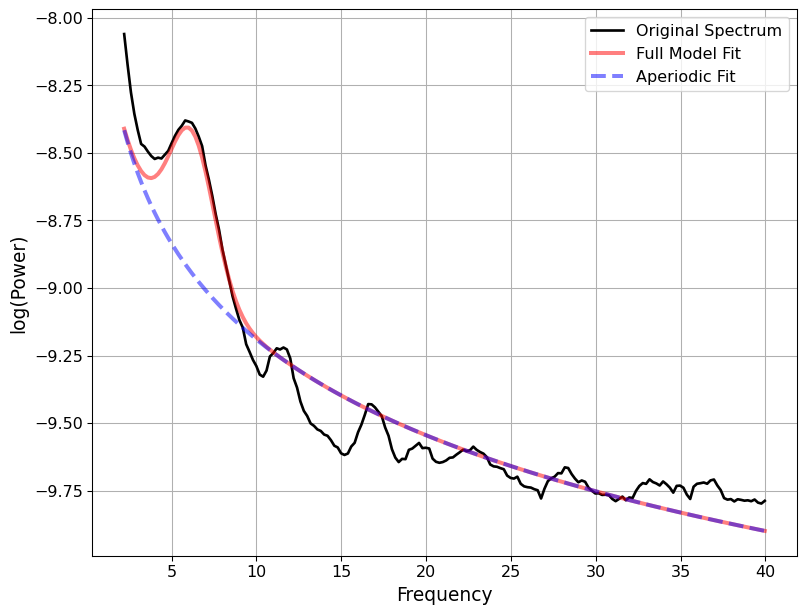

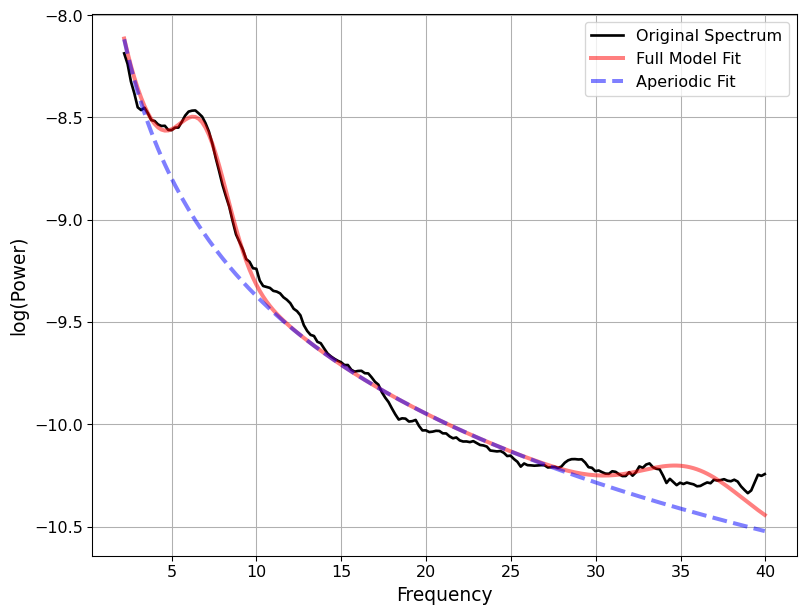

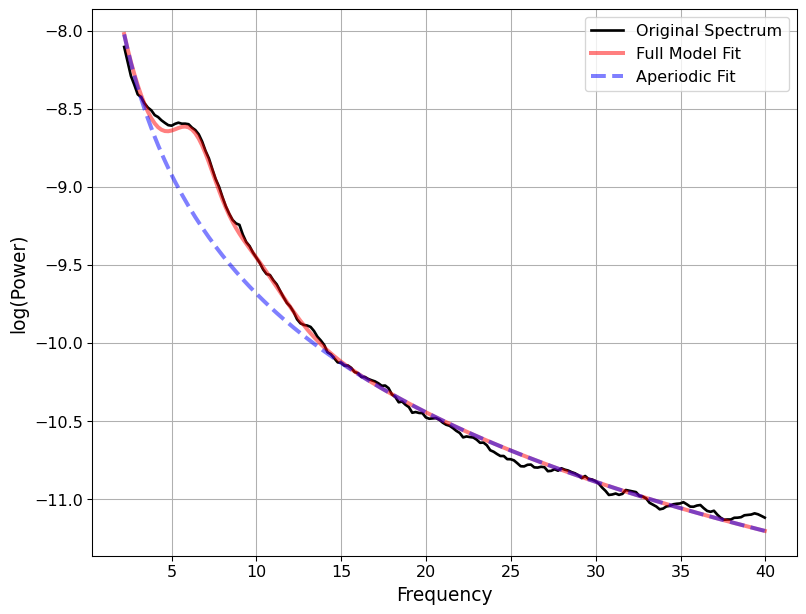

In [22]:
spectra_r_squared_fm = [
    fg.get_model(np.argmin(r_squared), regenerate=True),
    fg.get_model(argmedian(r_squared), regenerate=True),
    fg.get_model(np.argmax(r_squared), regenerate=True),
]

for fm, label in zip(spectra_r_squared_fm, labels_spectra_r_squared):
    # fm = fg.get_fooof(ind=2, regenerate=True)
    # Print results and plot extracted model fit
    fm.print_results()
    fm.plot()
    print(label)

In [23]:
df.to_csv(f"{specparam_path}/sub-{subject}-specparam.csv", index=False)
print(f"Subject {subject} done")

Subject 152 done


In [24]:
report.save(
    f"{project_path}/analysis/reports/sub-{subject}_report.html", overwrite=True
)

Overwriting existing file.


Saving report to : /Users/daniel/PhD/Projects/psd-path/analysis/reports/sub-152_report.html


'/Users/daniel/PhD/Projects/psd-path/analysis/reports/sub-152_report.html'